<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_6018/836531747.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


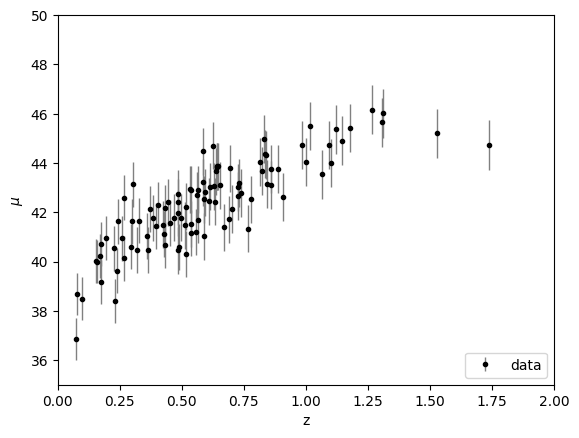

In [1]:

import numpy as np
import pylab as plt
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)
plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_6018/1254675948.py:28: SyntaxWarning: invalid escape sequence '\s'
  plt.fill_between(z_fit.ravel(), mu_pred - sigma, mu_pred + sigma, color='blue', alpha=0.2, label='1-$\sigma$')
/tmp/ipykernel_6018/1254675948.py:29: SyntaxWarning: invalid escape sequence '\s'
  plt.fill_between(z_fit.ravel(), mu_pred - 2*sigma, mu_pred + 2*sigma, color='blue', alpha=0.1, label='2-$\sigma$')
/tmp/ipykernel_6018/1254675948.py:32: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Distance $\mu$")
/mnt/c/Users/ASUS/Desktop/WSL_Shared/myenv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k

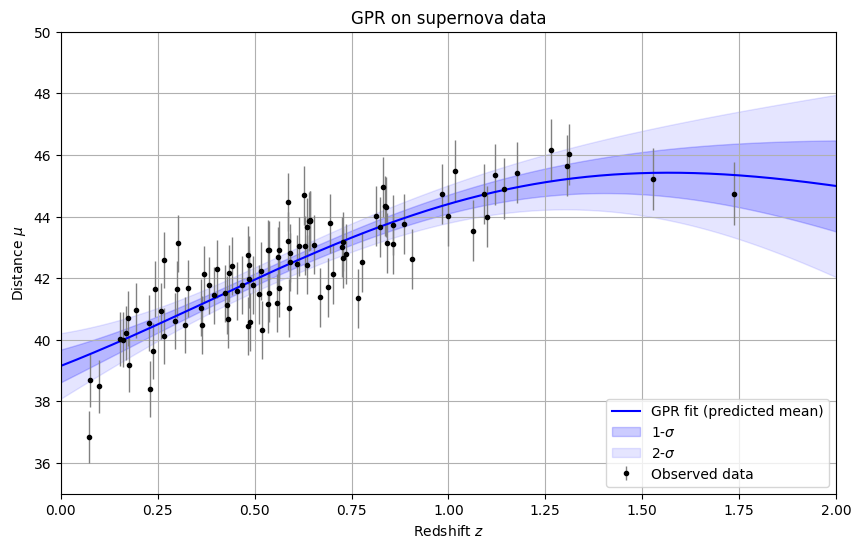

Optimized kernel (original data): 2.21**2 * RBF(length_scale=1.11) + WhiteKernel(noise_level=1e-05)


In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel

X = z_sample.reshape(-1, 1)  # sklearn expects 2D array
y = mu_sample
dy = dmu

# The kernel is: constant * RBF + white noise (to handle measurement uncertainties)
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 10)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-5, 10))
# The constant kernel starts at 1 and ranges from 10^-3 to 10^3; it represents the amplitude of the mu curve (i.e. how high it can go)
# RBF controls the smoothness and variation of the curve in z; bounds are chosen based on the z-range (this defines the shape of the curve)
# WhiteKernel = white noise to model observational noise

gp = GaussianProcessRegressor(kernel=kernel, alpha=dy**2, normalize_y=True)
# normalize_y sets the target to zero mean and unit variance before fitting

gp.fit(X, y)  # fit the model to the data

z_fit = np.linspace(0, 2, 1000).reshape(-1, 1)  # grid of z values for plotting

# Prediction with GPR
mu_pred, sigma = gp.predict(z_fit, return_std=True)
# sigma is the standard deviation of the predictive distribution (confidence band)

plt.figure(figsize=(10, 6))
plt.errorbar(z_sample, mu_sample, yerr=dy, fmt='.k', ecolor='gray', lw=1, label='Observed data')
plt.plot(z_fit, mu_pred, color='blue', label='GPR fit (predicted mean)')
plt.fill_between(z_fit.ravel(), mu_pred - sigma, mu_pred + sigma, color='blue', alpha=0.2, label='1-$\sigma$')
plt.fill_between(z_fit.ravel(), mu_pred - 2*sigma, mu_pred + 2*sigma, color='blue', alpha=0.1, label='2-$\sigma$')

plt.xlabel("Redshift $z$")
plt.ylabel("Distance $\mu$")
plt.legend(loc='lower right')
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.title("GPR on supernova data")
plt.grid(True)
plt.show()

# Interpret the results
print("Optimized kernel (original data):", gp.kernel_)


<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_6018/3069074141.py:29: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Distance $\mu$")
/tmp/ipykernel_6018/3069074141.py:31: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Simulation of new $\mu(z)$ data using GPR")


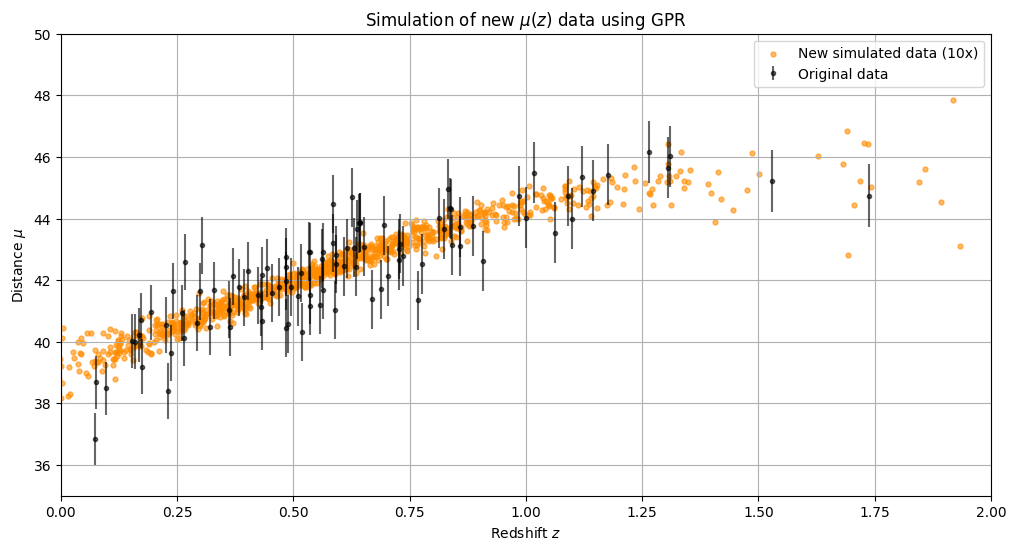

In [ ]:
from scipy.stats import gaussian_kde

# Estimate PDF of z and generate 10x new z values
kde = gaussian_kde(z_sample)
z_new = kde.resample(1000).ravel()  # draw 1000 new z samples

# Prediction on new z points
mu_new_pred, sigma_new_pred = gp.predict(z_new.reshape(-1, 1), return_std=True)
# use the GPR to evaluate new z values and get corresponding mu values on the function

# add realistic noise to mu
mu_simulated = np.random.normal(mu_new_pred, sigma_new_pred)

# Fit GPR on a regular grid for plotting
z_plot = np.linspace(0, 2, 1000).reshape(-1, 1)
mu_plot, sigma_plot = gp.predict(z_plot, return_std=True)


plt.figure(figsize=(12, 6))

# Original data
plt.errorbar(z_sample, mu_sample, yerr=dy, fmt='.k',  alpha=0.6, label='Original data')

# Simulated data
plt.scatter(z_new, mu_simulated, color='darkorange', s=50, alpha=0.6, label='New simulated data (10x)', marker='.')

plt.xlabel("Redshift $z$")
plt.ylabel("Distance $\mu$")
plt.legend()
plt.title("Simulation of new $\mu(z)$ data using GPR")
plt.grid(True)
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.show()


<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_6018/3198687693.py:20: SyntaxWarning: invalid escape sequence '\s'
  color='green', alpha=0.4, label='1-$\sigma$ (new fit)')
/tmp/ipykernel_6018/3198687693.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.fill_between(z_fit.ravel(), mu_fit - 2*sigma_fit, mu_fit + 2*sigma_fit, color='green', alpha=0.2, label='2-$\sigma$')
/tmp/ipykernel_6018/3198687693.py:25: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Distance $\mu$")
/mnt/c/Users/ASUS/Desktop/WSL_Shared/myenv/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower b

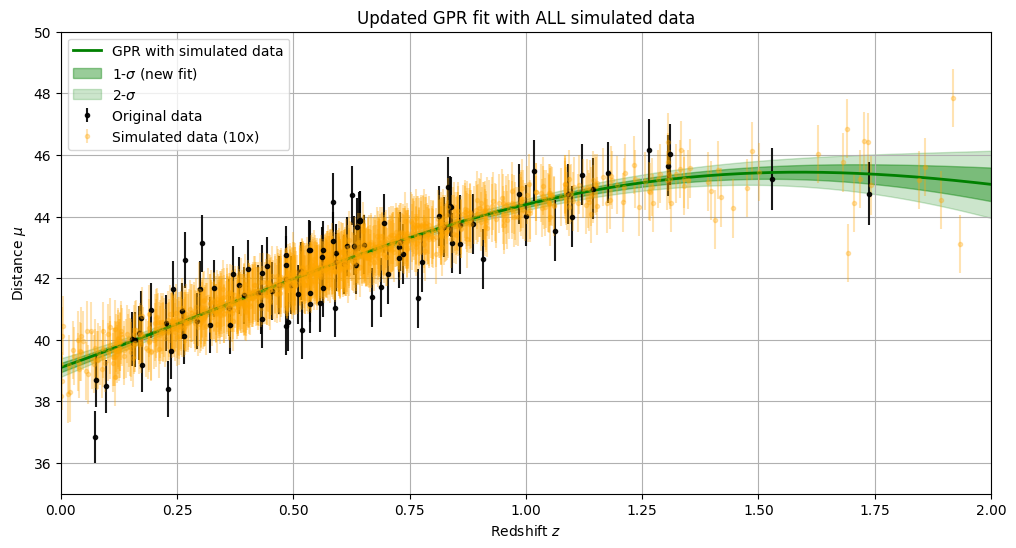

Optimized kernel (original data): 2.21**2 * RBF(length_scale=1.11) + WhiteKernel(noise_level=1e-05)
Optimized kernel (total data): 2.52**2 * RBF(length_scale=1.32) + WhiteKernel(noise_level=1e-05)


In [4]:
X_total = np.concatenate([z_sample, z_new]).reshape(-1, 1)  # concatenate all z values
y_total = np.concatenate([mu_sample, mu_simulated])         # concatenate all mu values

dy_simulated = np.full(mu_simulated.shape, np.mean(dmu))    # assign homoscedastic noise to simulated data equal to the mean of original errors
dy_total = np.concatenate([dmu, dy_simulated])              # concatenate all error bars

# Refit GPR on all data
gp_total = GaussianProcessRegressor(kernel=kernel, alpha=dy_total**2, normalize_y=True)
gp_total.fit(X_total, y_total)

# Prediction
z_fit = np.linspace(0, 2, 1000).reshape(-1, 1)
mu_fit, sigma_fit = gp_total.predict(z_fit, return_std=True)

plt.figure(figsize=(12, 6))
plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt='.k', label='Original data', alpha=0.9)
plt.errorbar(z_new, mu_simulated, yerr = np.mean(dmu),fmt='.k', color='orange', alpha=0.3, label='Simulated data (10x)')
plt.plot(z_fit, mu_fit, color='green', lw=2, label='GPR with simulated data')
plt.fill_between(z_fit.ravel(), mu_fit - sigma_fit, mu_fit + sigma_fit,
                 color='green', alpha=0.4, label='1-$\sigma$ (new fit)')
plt.fill_between(z_fit.ravel(), mu_fit - 2*sigma_fit, mu_fit + 2*sigma_fit, color='green', alpha=0.2, label='2-$\sigma$')


plt.xlabel("Redshift $z$")
plt.ylabel("Distance $\mu$")
plt.title("Updated GPR fit with ALL simulated data")
plt.legend()
plt.grid(True)
plt.xlim(0, 2)
plt.ylim(35, 50)
plt.show()

# Interpret the results
print("Optimized kernel (original data):", gp.kernel_)
print("Optimized kernel (total data):", gp_total.kernel_)


*** MANCA LA TERZA PARTE PER L'ESAME ***